In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
import pickle
from sklearn.model_selection import train_test_split
import random
import os
import cv2
from tqdm import tqdm

DATADIR = "E:\\UNIVERSIY\\PROJECTS\\LEVEL_3\\First_Term\\SeLected\\dataset\\English\\Fnt\\train"
# DATADIR = "E:\ProjectSelected\English\Fnt"

CATEGORIES = ["Sample001","Sample002","Sample003","Sample004","Sample005","Sample006",
              "Sample007","Sample008","Sample009","Sample010","Sample019","Sample020","Sample021","Sample022"
             ,"Sample023","Sample024",'Sample042']

training_data = []
IMG_SIZE = 75


def create_training_data():
    for category in CATEGORIES:  

        path = os.path.join(DATADIR, category)  # create path to classes
        class_num = CATEGORIES.index(category)  # get the classification
        # tqdm : عشان تظهر الخط الاحمر دا ف تحميل الداتا اشوفها وهيبتحمل 
        for img in tqdm(os.listdir(path)):  # iterate over each image per class
            try:
                img_array = cv2.imread(os.path.join(path, img), cv2.IMREAD_GRAYSCALE)  # convert to array
                new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))  # resize to normalize data size
                training_data.append([new_array, class_num])  # add this to our training_data
            # except Exception as e:  # in the interest in keeping the output clean...
            #     pass
            except Exeption as e:
                pass


create_training_data()


100%|█████████████████████████████████████████████████████████████████████████████| 1011/1011 [00:03<00:00, 255.50it/s]


In [2]:
print(len(training_data))

17161


In [3]:
#randome the dataset for good training
random.shuffle(training_data)
X = []
y = []

#build input (x) , output (y) arrays
for features, label in training_data:
    X.append(features)
    y.append(label)

X=np.array(X).reshape(-1,IMG_SIZE,IMG_SIZE,1)
X_train_full, X_test, y_train_full, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)
#data normalization
X_valid, X_train = X_train_full[:2700] / 255., X_train_full[2700:]/255.
y_valid, y_train = y_train_full[:2700], y_train_full[2700:]
X_test = X_test / 255.

X_train= np.asarray(X_train)
y_train = np.asarray(y_train)
X_valid = np.asarray(X_valid)
y_valid = np.asarray(y_valid)
X_test = np.asarray(X_test)
y_test = np.asarray(y_test)

#save the dataset so that we don't need to keep calculating it every time we want


In [4]:
data = {"0" : 0,"1" : 1 ,"2" :2 ,"3" : 3,"4" : 4,"5" : 5,
              "6" : 6,"7" : 7,"8" : 8,"9" :9,"i" : 10, "j" : 11,"k" : 12,"L":13
             ,"M" : 14,"N":15 , 'F':16 }


In [5]:
def getclass (n):
    for x,y in data.items():
         if n==y :
            return x

In [6]:
print(getclass(16))

F


In [7]:
# load data in pickle
import pickle
pickle_out=open("X.pickle","wb")
pickle.dump(X, pickle_out)
pickle_out.close()

pickle_out=open("y.pickle","wb")
pickle.dump(y, pickle_out)
pickle_out.close()


In [8]:
# load the dataset
pickle_in = open("X.pickle","rb")
X = pickle.load(pickle_in)

pickle_in = open("y.pickle","rb")
y = pickle.load(pickle_in)


In [9]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense , Dropout , Activation , Flatten , Conv2D , MaxPooling2D
# ANN model
model = tf.keras.models.Sequential()
# we will add some layers وبنبدء بالفلاترن لير لانها تعتبر الباداية ي معلم و بندخل هنا ال input shape 
# input_shape=(IMG_SIZE,IMG_SIZE)
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(256, activation='relu'))
model.add(tf.keras.layers.Dense(128, activation="relu"))
model.add(tf.keras.layers.Dense(64, activation="relu"))
model.add(tf.keras.layers.Dense(17, activation="softmax"))

model.compile(loss="sparse_categorical_crossentropy",
             optimizer="adam",
             metrics=['accuracy'],
             run_eagerly=True)

history = model.fit(X_train,y_train,epochs=20,validation_data=(X_valid,y_valid))

loss , acc = model.evaluate(X_test,y_test)

print('loss is : ',loss)
print('accuracy is : ',acc)
 
model.save('Image_ANN.model')

Epoch 1/20
345/345 [==============================] - 19s 55ms/step - loss: 1.2209 - accuracy: 0.6568 - val_loss: 0.6471 - val_accuracy: 0.8181
Epoch 2/20
345/345 [==============================] - 20s 57ms/step - loss: 0.5520 - accuracy: 0.8377 - val_loss: 0.3973 - val_accuracy: 0.8822
Epoch 3/20
345/345 [==============================] - 18s 53ms/step - loss: 0.4212 - accuracy: 0.8754 - val_loss: 0.3594 - val_accuracy: 0.9011
Epoch 4/20
345/345 [==============================] - 20s 58ms/step - loss: 0.3676 - accuracy: 0.8949 - val_loss: 0.3783 - val_accuracy: 0.8919
Epoch 5/20
345/345 [==============================] - 19s 56ms/step - loss: 0.3363 - accuracy: 0.8975 - val_loss: 0.2865 - val_accuracy: 0.9178
Epoch 6/20
345/345 [==============================] - 19s 56ms/step - loss: 0.2950 - accuracy: 0.9086 - val_loss: 0.3549 - val_accuracy: 0.8911
Epoch 7/20
345/345 [==============================] - 21s 60ms/step - loss: 0.2880 - accuracy: 0.9107 - val_loss: 0.2713 - val_accuracy:

INFO:tensorflow:Assets written to: Image_ANN.model\assets


INFO:tensorflow:Assets written to: Image_ANN.model\assets


In [14]:
model.save('Selected ANN image.model')

INFO:tensorflow:Assets written to: Selected ANN image.model\assets


INFO:tensorflow:Assets written to: Selected ANN image.model\assets


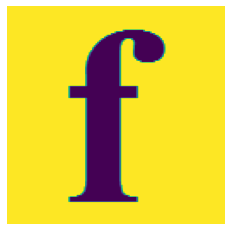

1/1 [==============================] - 0s 23ms/step
Prediction is  F


In [12]:
img_prd = []
img_prd = cv2.imread("E:\\UNIVERSIY\\PROJECTS\\LEVEL_3\\First_Term\\SeLected\dataset\\English\\test\\img042-00018.png",cv2.IMREAD_GRAYSCALE)
img = cv2.resize(img_prd,(IMG_SIZE,IMG_SIZE))
plt.imshow(img_prd)
plt.axis('off')
plt.show()
img_prd = np.array([img])
img_prd = img_prd/255.
result_class = model.predict(img_prd)
prediction = np.argmax(result_class)
print('Prediction is ',getclass(prediction))

